# Simple Pendulum

> A pendulum is a weight suspended from a pivot so that it can swing freely. When a pendulum is displaced sideways from its resting, equilibrium position, it is subject to a restoring force due to gravity that will accelerate it back toward the equilibrium position.

[From Wikipedia](https://en.wikipedia.org/wiki/Pendulum)

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from math import sin, cos

## Functions

In [2]:
def simplePendulum(t, x):
    # Same function is derived using the tensor of inertia
    dx = np.zeros((len(x)))
        
    theta = x[0]
    d_theta = x[1]
    
    dx[0]= d_theta
    dx[1] = -(g/l)*sin(x[0])
    
    return dx

In [17]:
def simplePendulumLinear(t, x):
    # Same function is derived using the tensor of inertia
    dx = np.zeros((len(x)))
        
    theta = x[0]
    d_theta = x[1]
    
    dx[0]= d_theta
    dx[1] = -(g/l)*x[0]
    
    return dx

In [12]:
def simplePendulumFriction(t,x):
    dx = np.zeros((len(x)))
    theta = x[0]
    d_theta = x[1]
    dx[0]= d_theta
    dx[1] = -(g/l)*sin(x[0]) - (k/(m*(l^2)))*x[1]                            
    return dx

In [18]:
def simplePendulumFrictionLinear(t,x):
    dx = np.zeros((len(x)))
    theta = x[0]
    d_theta = x[1]
    dx[0]= d_theta
    dx[1] = -(g/l)*x[0] - (k/(m*(l^2)))*x[1]                            
    return dx

## Initial Conditions

In [94]:
x0 = np.array([n(pi/18),1.0])
g = 9.81
l = 1
m = 1
k = 1

## Solve the system numerically

In [95]:
tempSol = integrate.solve_ivp(simplePendulum,[0,10],x0, max_step=0.05)
tempSolLinear = integrate.solve_ivp(simplePendulumLinear,[0,10],x0, max_step=0.05)
tempSol2 = integrate.solve_ivp(simplePendulumFriction,[0,10],x0, max_step=0.05)
tempSol2Linear = integrate.solve_ivp(simplePendulumFrictionLinear,[0,10],x0, max_step=0.05)

## Plot your results

### Simple Pendulum without friction

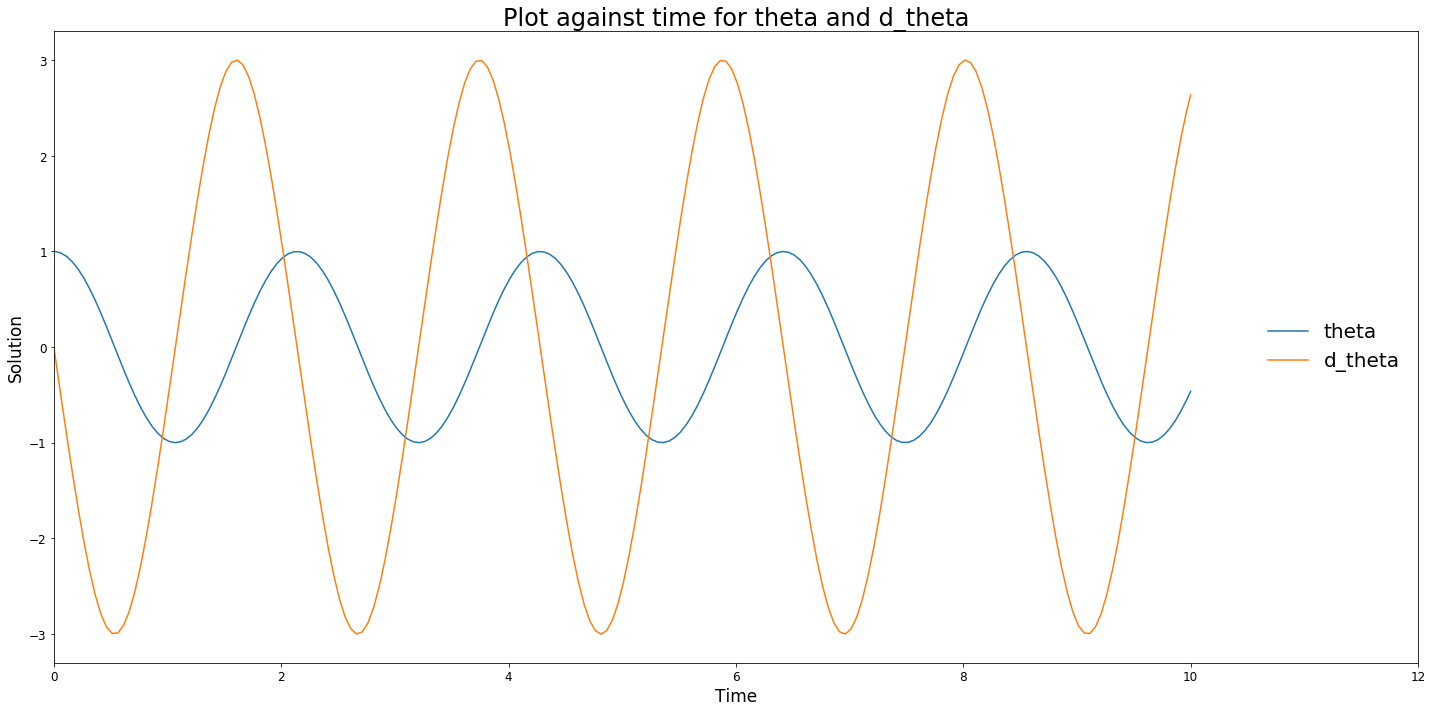

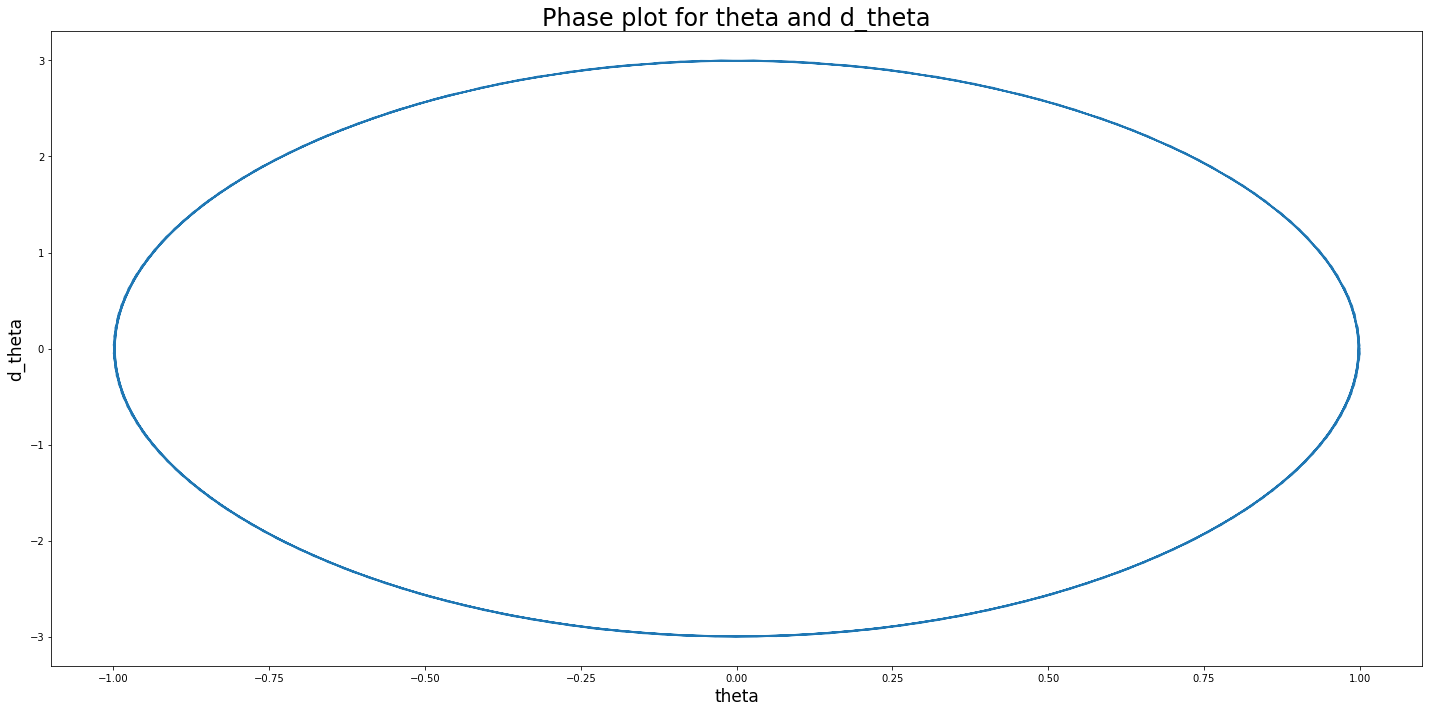

In [15]:
xs = np.transpose(tempSol.y)
ts = np.transpose(tempSol.t)

xl = np.transpose(tempSolLinear.y)
tl = np.transpose(tempSolLinear.t)

plt.figure(num=1,figsize=(20,10))
plt.plot(ts, xs[:,0],ts,xs[:,1])
plt.xlim(0, 12)
plt.legend(['theta','d_theta'], loc=5,fontsize=20,frameon=False)
plt.xlabel('Time', fontsize=17)
plt.tick_params(labelsize='large')
plt.ylabel('Solution', fontsize=17)
plt.title("Plot against time for theta and d_theta",fontsize=24)
plt.tight_layout()
    


plt.figure(num=3,figsize=(20,10))
plt.plot(xs[:,0], xs[:,1])
#plt.legend(["Posicion angular alpha"], loc=5,fontsize=20,frameon=False)
plt.xlabel('theta', fontsize=17)
plt.ylabel('d_theta', fontsize=17)
plt.title("Phase plot for theta and d_theta",fontsize=24)
plt.tight_layout()
    


### Simple Pendulum with friction

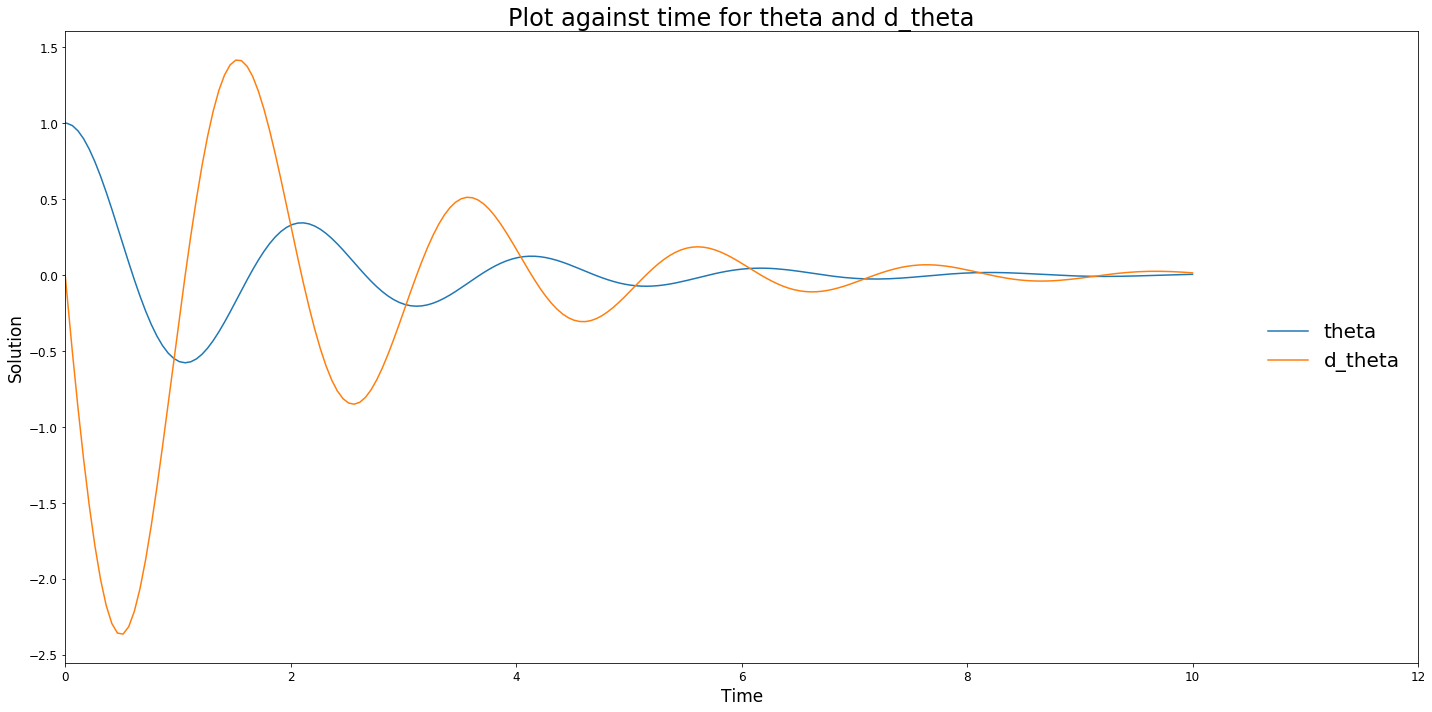

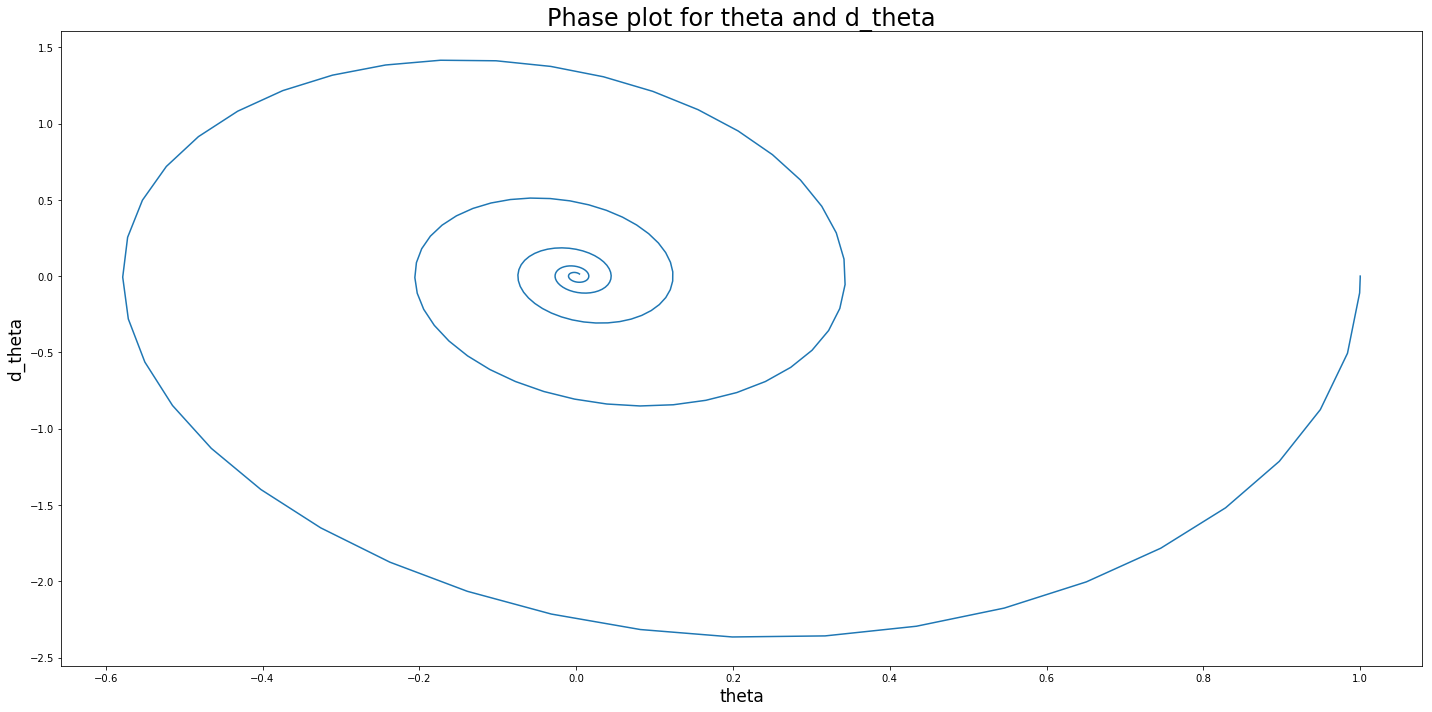

In [21]:
xs2 = np.transpose(tempSol2.y)
ts2 = np.transpose(tempSol2.t)

plt.figure(num=11,figsize=(20,10))
plt.plot(ts2, xs2[:,0],ts2,xs2[:,1])
plt.xlim(0, 12)
plt.legend(['theta','d_theta'], loc=5,fontsize=20,frameon=False)
plt.xlabel('Time', fontsize=17)
plt.tick_params(labelsize='large')
plt.ylabel('Solution', fontsize=17)
plt.title("Plot against time for theta and d_theta",fontsize=24)
plt.tight_layout()
    

plt.figure(num=13,figsize=(20,10))
plt.plot(xs2[:,0], xs2[:,1])
#plt.legend(["Posicion angular alpha"], loc=5,fontsize=20,frameon=False)
plt.xlabel('theta', fontsize=17)
plt.ylabel('d_theta', fontsize=17)
plt.title("Phase plot for theta and d_theta",fontsize=24)
plt.tight_layout()
    

## Compare solutions

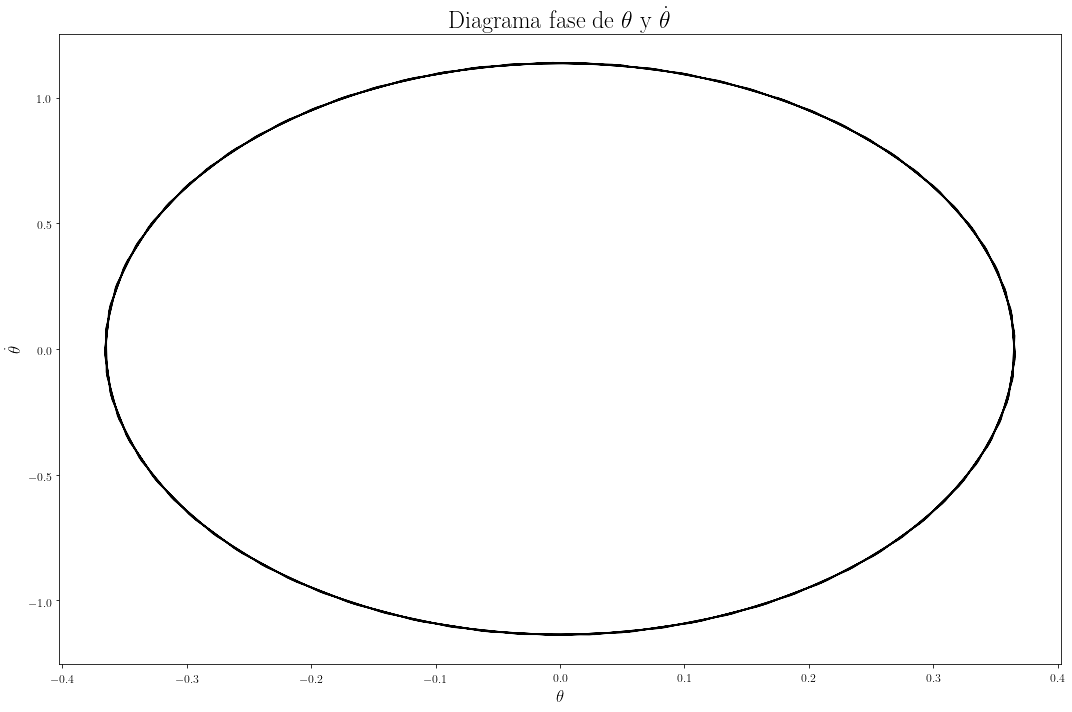

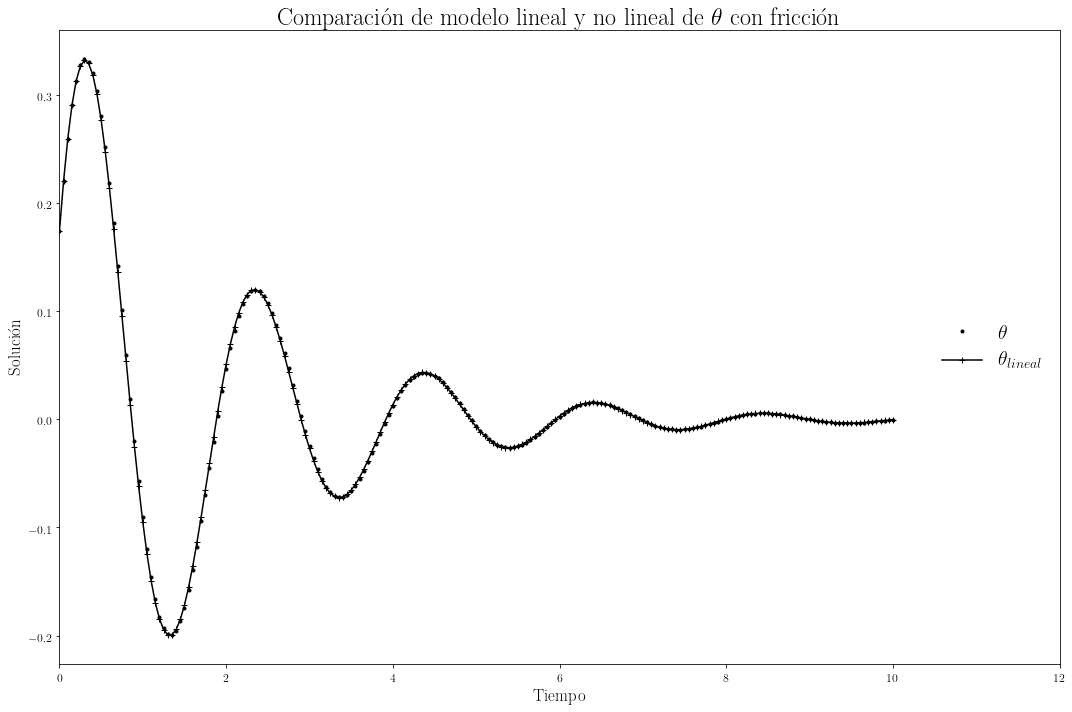

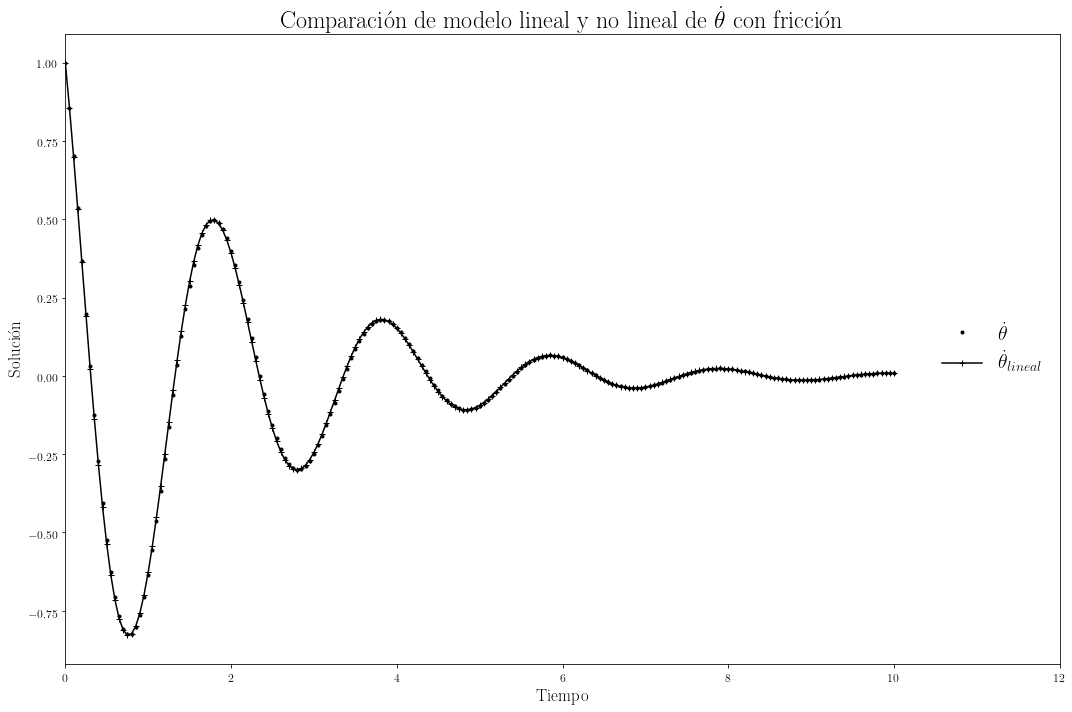

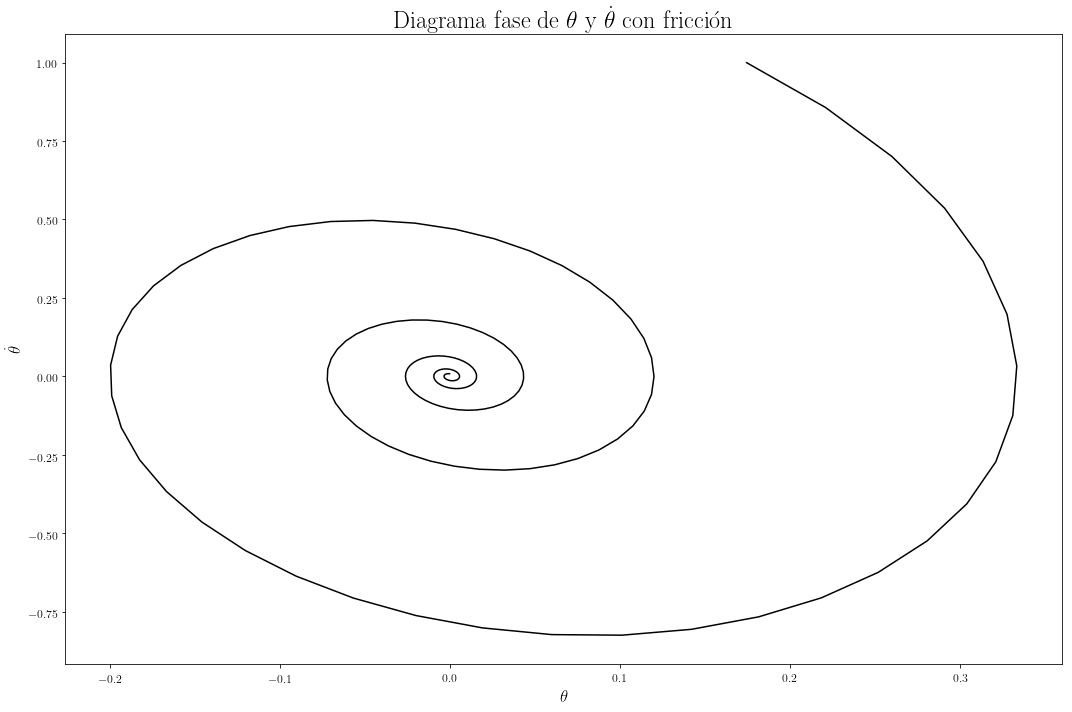

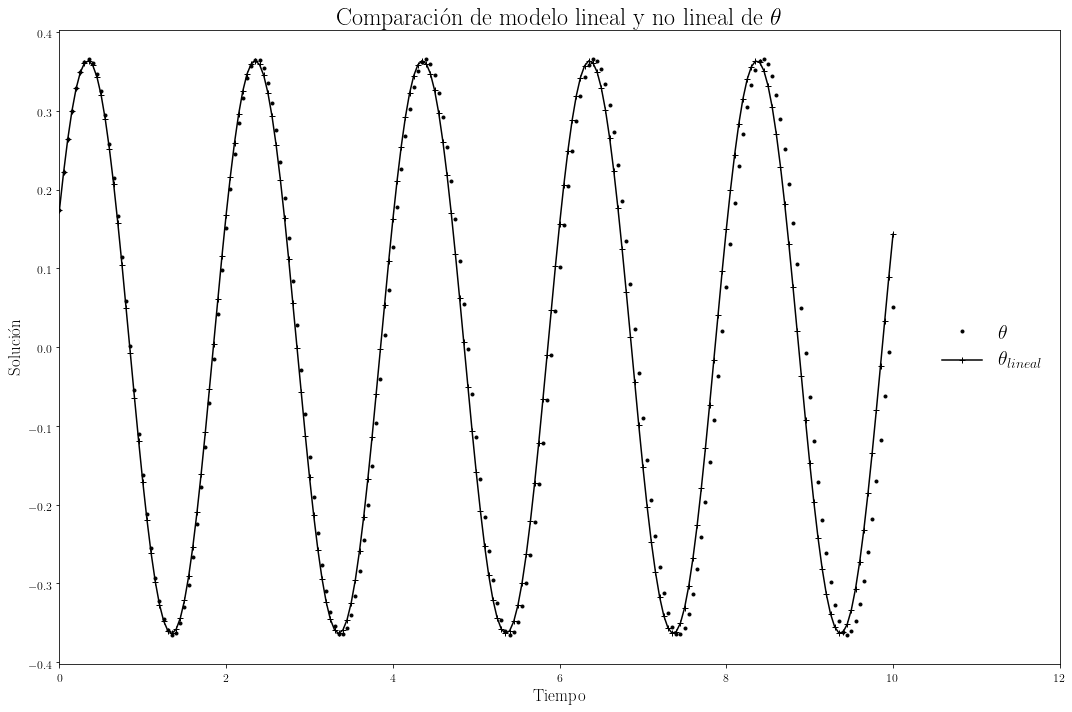

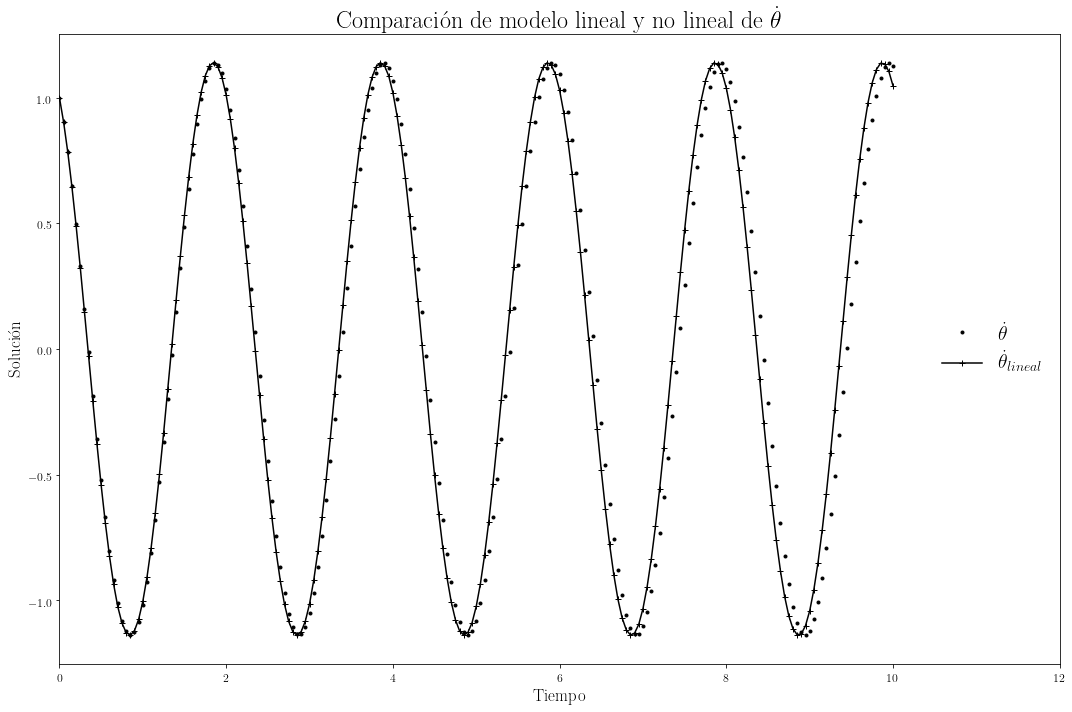

In [99]:
xs = np.transpose(tempSol.y)
ts = np.transpose(tempSol.t)

xl = np.transpose(tempSolLinear.y)
tl = np.transpose(tempSolLinear.t)

xs2 = np.transpose(tempSol2.y)
ts2 = np.transpose(tempSol2.t)

xl2 = np.transpose(tempSol2Linear.y)
tl2 = np.transpose(tempSol2Linear.t)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(num=30,figsize=(15,10))
plt.plot(ts, xs[:,0],".k",tl,xl[:,0],"-+k")
plt.xlim(0, 12)
plt.legend([u'$\\theta$',u'$\\theta_{lineal}$'], loc=5,fontsize=20,frameon=False)
plt.xlabel(u'Tiempo', fontsize=17)
plt.tick_params(labelsize='large')
plt.ylabel(u"Soluci\\'on", fontsize=17)
plt.title(u"Comparaci\\'on de modelo lineal y no lineal de $\\theta$",fontsize=24)
plt.tight_layout()    

plt.figure(num=31,figsize=(15,10))
plt.plot(ts, xs[:,1],".k",tl,xl[:,1],"-+k")
plt.xlim(0, 12)
plt.legend([u'$\dot{\\theta}$',u'$\dot{\\theta}_{lineal}$'], loc=5,fontsize=20,frameon=False)
plt.xlabel(u'Tiempo', fontsize=17)
plt.tick_params(labelsize='large')
plt.ylabel(u"Soluci\\'on", fontsize=17)
plt.title(u"Comparaci\\'on de modelo lineal y no lineal de $\dot{\\theta}$",fontsize=24)
plt.tight_layout()    


plt.figure(num=32,figsize=(15,10))
plt.plot(xs[:,0],xs[:,1],"k")
#plt.xlim(0, 12)
#plt.legend([u'$\dot{\\theta}$',u'$\dot{\\theta}_{linear}$'], loc=5,fontsize=20,frameon=False)
plt.xlabel(u'$\\theta$', fontsize=17)
plt.tick_params(labelsize='large')
plt.ylabel(u"$\dot{\\theta}$", fontsize=17)
plt.title(u"Diagrama fase de $\\theta$ y  $\dot{\\theta}$",fontsize=24)
plt.tight_layout()   


plt.figure(num=33,figsize=(15,10))
plt.plot(ts2, xs2[:,0],".k",tl2,xl2[:,0],"-+k")
plt.xlim(0, 12)
plt.legend([u'$\\theta$',u'$\\theta_{lineal}$'], loc=5,fontsize=20,frameon=False)
plt.xlabel(u'Tiempo', fontsize=17)
plt.tick_params(labelsize='large')
plt.ylabel(u"Soluci\\'on", fontsize=17)
plt.title(u"Comparaci\\'on de modelo lineal y no lineal de $\\theta$ con fricci\\'on",fontsize=24)
plt.tight_layout()    

plt.figure(num=34,figsize=(15,10))
plt.plot(ts2, xs2[:,1],".k",tl2,xl2[:,1],"-+k")
plt.xlim(0, 12)
plt.legend([u'$\dot{\\theta}$',u'$\dot{\\theta}_{lineal}$'], loc=5,fontsize=20,frameon=False)
plt.xlabel(u'Tiempo', fontsize=17)
plt.tick_params(labelsize='large')
plt.ylabel(u"Soluci\\'on", fontsize=17)
plt.title(u"Comparaci\\'on de modelo lineal y no lineal de $\dot{\\theta}$ con fricci\\'on",fontsize=24)
plt.tight_layout()    


plt.figure(num=35,figsize=(15,10))
plt.plot(xs2[:,0],xs2[:,1],"k")
#plt.xlim(0, 12)
#plt.legend([u'$\dot{\\theta}$',u'$\dot{\\theta}_{linear}$'], loc=5,fontsize=20,frameon=False)
plt.xlabel(u'$\\theta$', fontsize=17)
plt.tick_params(labelsize='large')
plt.ylabel(u"$\dot{\\theta}$", fontsize=17)
plt.title(u"Diagrama fase de $\\theta$ y  $\dot{\\theta}$ con fricci\\'on",fontsize=24)
plt.tight_layout()   